# Лабораторная работа 5. Метод градиентного спуска
В этой работе вы
- познакомитесь с некоторыми возможностями Matplotlib по визуализации трехмерных поверхностей;
- реализуете метод градиентного спуска
- отобразите итерационный процесс на графиках исследуемых поверхностей

## Построение графиков поверхностей в Matplotlib

Для построения трехмерных объектов будем использовать инструментарий `mplot3d`.
Основными особенностями 3D-визуализации (по сравнению с  2D) являются:
- использование трехмерной системы координат (реализуем путем `plt.axes(projection='3d')`);
- необходимость задавать угол обзора (`ax.view_init(..., ...)`)
- использование трехмерных сеток для нанесения изображения на систему координат

Для начала изучим работу функции `plot_surface()`, позволяющей создавать графики поверхностей, у которых значение координаты $z$ вычисляется как фукнция от узла сетки $(x,y)$

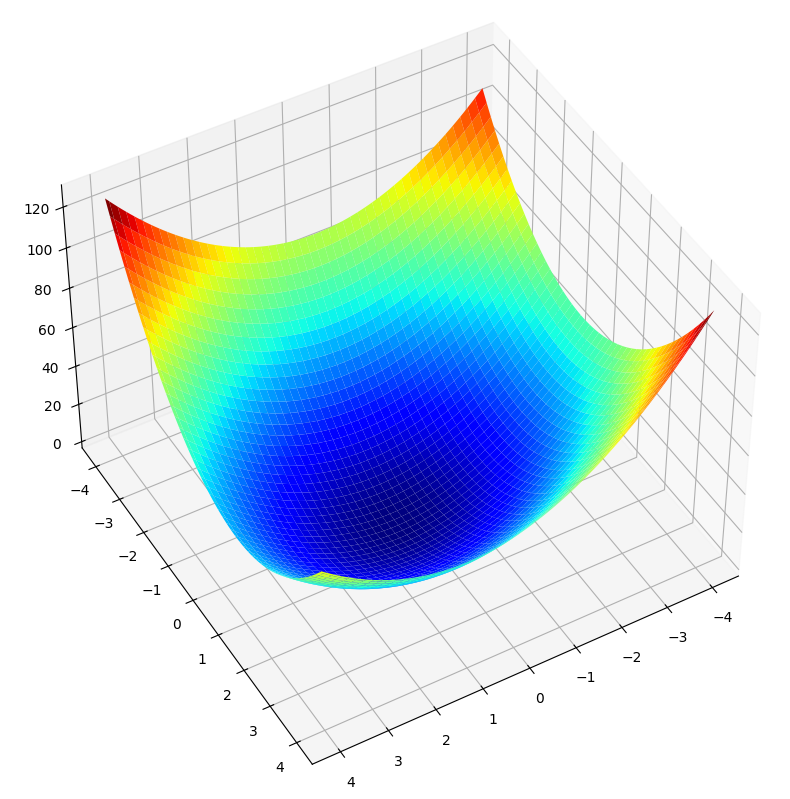

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

# уравнение поверхности
f = lambda x, y: 3*x**2 + 4*y**2 - x*y - 2*(x + y)

# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))

# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')

# Задаем угол обзора
ax.view_init(45, 60)

# размечаем границы осей для аргументов
xval = np.linspace(-4, 4, 100)
yval = np.linspace(-4, 4, 100)

# создаём массив с xval столбцами и yval строками - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)

# приравниваем z к функции от x и y 
z = f(x, y)

# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, 
# шаг прорисовки сетки - чем меньше значение, тем плавнее будет градиент на поверхности
rstride = 2,
cstride = 2,
# цветовая схема 
cmap = cm.jet)

Цветовая сетка - способ визуализации линий уровня трехмерной поверхности на плоскости.  Цвет точки отражает значение функции в этой точке. Например, для цветовой схемы `cm.jet`переход синего к красному соответвует увеличению значений функции.

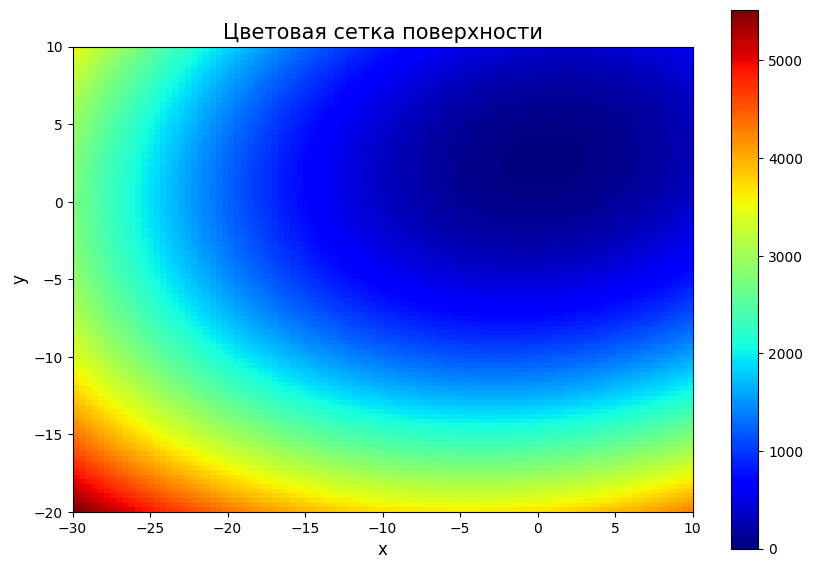

In [3]:
xx = np.linspace(-30, 10,100)
yy = np.linspace(-30, 10, 100)

x_shape, y_shape= xx.shape[0], yy.shape[0]
Z = np.empty((x_shape, y_shape)) # Создаем матрицу, в которую поместим значения функции в точках сетки (x,y)
for i in range(0,x_shape):
    for j in range(0,y_shape):
        Z[j,i]=f(xx[i],yy[j])    # Заносим в матрицу значения функции. Обратите внимание на порядок индексов
fig = plt.figure(figsize = (10,7))
plt.imshow(Z, # Массив со значениями функции
           extent = [-30,10,-20,10],# область построения
           origin = 'lower',# рост значений координаты y снизу вверх (если нужно наоборот, используйте 'upper')
           cmap = 'jet')#цветовая схема
plt.title("Цветовая сетка поверхности", fontsize=15)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.colorbar()# отображение цветовой шкалы
plt.show()

## 📌📌📌 Задание. Визуализация итерационного процесса  градиентного спуска.


1. Визуализируйте цветовую схему функции $f(x,y)$ в прямоугольной области $A$.

     **Вариант 1**: $f(x,y)=0.5x^2+0.25y^4-0.5y^2, \quad A=[-2,2]\times [-2,2], \quad \varepsilon=10^{-6}$
     
     **Вариант 2**: $f(x,y)=\ln(x)y^2, \quad A=[1,10]\times [-5,5], \quad \varepsilon=10^{-6}$
     
     **Вариант 3**: $f(x,y)=\ln(x)\ln(100 y^2), \quad  A=[1,10]\times [-5,5], \quad \varepsilon=10^{-6}$
     
     **Вариант 4**:  $f(x,y)=\sin(x/2)\sin(y/2)\quad A=[0,12]\times [0,12], \quad \varepsilon=10^{-3}$
     
     
3. Создайте функцию, реализующую итерационный процесс метода градиентного спуска и возвращающую
    - итерационную последовательность $(x_i, y_i)$;
    - число проведенных итераций

    В качестве критерия останова используйте $\|grad(x_i, y_i)\|\leq \varepsilon$.
    
    Кроме начальной точки и значения $\varepsilon$, аргументом фукнции должно значение $h$ - множитель, отвечающий за величину шага в сторону антиградиента.
    
      **Вариант 4** : функция, реализующая метод градиентного спуска должна позволять как использование постоянного  шага   $h$, так и переменного, например $\frac{h}{i}$, где $i$ - номер итерации.
      
      
3. Выберите начальную точку 2 разными способами и реализуйте метод градиентного спуска. 

    Изобразите полученные 2 итерационные последовательности поверх цветовой схемы разными цветами. По визуализации должно быть понятно направление итерационного процесса - какая точка является конечной в итерационной последовательности.

    Визуализация может выглядеть, например, так:
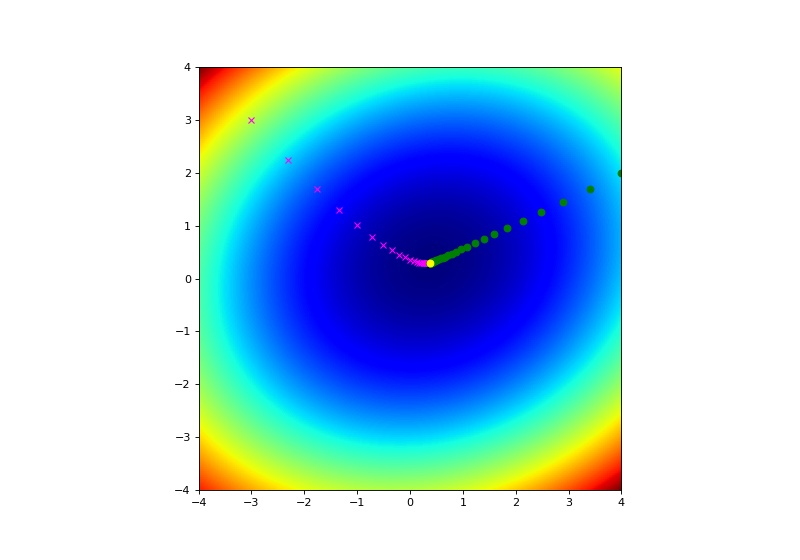



Первая траектория: 1000 итераций
[6.83870575 6.96794773]
[6.03154788 6.32222994]
[6.00733942 6.47905882]
[5.92662966 6.59308153]
[5.83170291 6.70258803]
[5.73025977 6.81205074]
[5.62549433 6.92182858]
[5.51938673 7.0313375 ]
[5.4134218  7.13974716]
[5.3087966  7.24620591]
[5.20648801 7.34993551]
[5.10727741 7.45027645]
[5.01176426 7.54670801]
[4.92037968 7.63885205]
[4.83340333 7.72646579]
[4.75098348 7.80942744]
[4.67315878 7.88771773]
[4.59988029 7.9614002 ]
[4.53103202 8.03060195]
[4.4664494 8.0954962]
[4.40593485 8.15628731]
[4.34927064 8.21319845]
[4.29622892 8.26646184]
[4.24657945 8.31631131]
[4.20009516 8.36297684]
[4.15655614 8.40668079]
[4.11575228 8.4476353 ]
[4.0774849 8.4860408]
[4.04156753 8.52208517]
[4.00782631 8.55594354]
[3.9760998  8.58777841]
[3.94623868 8.61774003]
[3.91810517 8.64596698]
[3.89157237 8.67258684]
[3.86652359 8.69771693]
[3.8428516  8.72146499]
[3.82045794 8.74392997]
[3.79925219 8.7652027 ]
[3.77915133 8.78536658]
[3.76007911 8.80449818]
[3.74196548

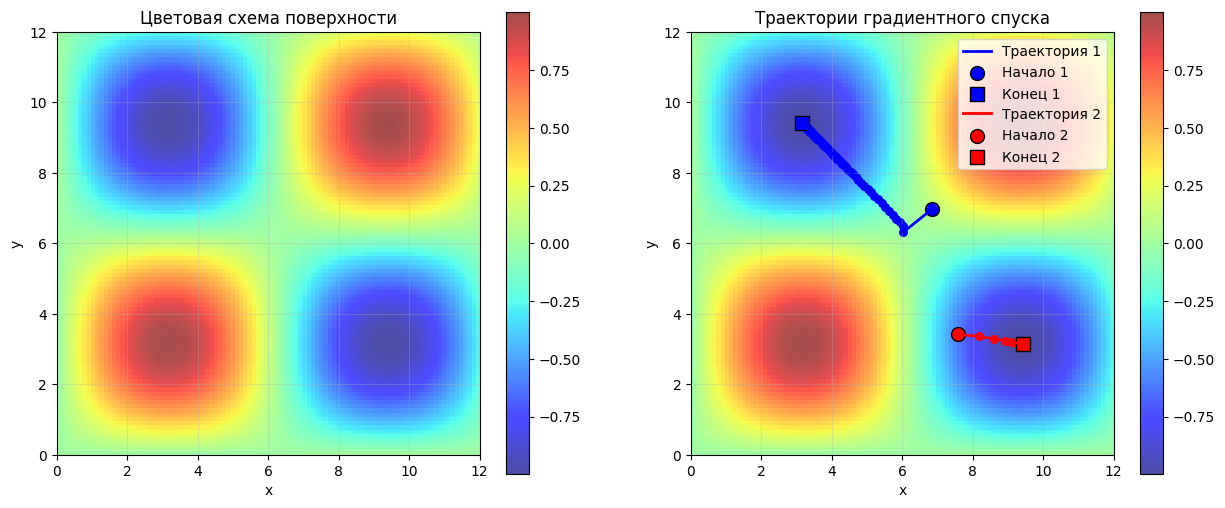


Результаты:
Траектория 1: начальная точка (6.84, 6.97)
Траектория 1: конечная точка (3.1526, 9.4137), f = -0.999969
Траектория 2: начальная точка (7.57, 3.42)
Траектория 2: конечная точка (9.4218, 3.1422), f = -0.999999


In [7]:
# Ваш код
import numpy as np
import matplotlib.pyplot as plt
# 1
def f(x, y):
    return np.sin(x/2) * np.sin(y/2)

A = [0, 12]
epsilon = 1e-3

x_val = np.linspace(A[0], A[1], 100)
y_val = np.linspace(A[0], A[1], 100)
x, y = np.meshgrid(x_val, y_val)
z = f(x, y)

# Градиент функции
def gradient(x, y):
    df_dx = 0.5 * np.cos(x/2) * np.sin(y/2)
    df_dy = 0.5 * np.sin(x/2) * np.cos(y/2)
    if x > A[1] or x < A[0] or y > A[1] or y < A[0]:
        return np.array([np.inf,np.inf])
    return np.array([df_dx, df_dy])

# 2
def gradient_descent(start_point, epsilon=1e-3, h=0.1, step_type='constant', max_iter=1000):
    points = [start_point.copy()]
    step_size = h
    
    current_point = start_point.copy()
    
    for i in range(1, max_iter + 1):
        grad = gradient(current_point[0], current_point[1])
        grad_norm = np.linalg.norm(grad)
        
        if grad_norm <= epsilon:
            break
            
        if step_type == 'constant':
            ...
        else:
            step_size = h / i
        
        current_point = current_point - step_size * grad
        points.append(current_point.copy())
    
    return np.array(points), i

# 3 
start_point1 = np.array([np.random.uniform(2,8), np.random.uniform(2,8)])
points1, iter1 = gradient_descent(start_point1, epsilon=epsilon, h=5, step_type='variable')

start_point2 = np.array([np.random.uniform(2,8), np.random.uniform(2,8)])
points2, iter2 = gradient_descent(start_point2, epsilon=epsilon, h=1.5, step_type='constant')

print(f"Первая траектория: {iter1} итераций")
for pnt in points1:
    print(pnt)
print(f"Вторая траектория: {iter2} итераций")
for pnt in points2:
    print(pnt)

# 4. Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Пустая цветовая схема
im = ax1.imshow(z, 
                extent=[A[0], A[1], A[0], A[1]],
                origin='lower',
                cmap='jet',
                alpha=0.7)
ax1.set_title("Цветовая схема поверхности")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True, alpha=0.3)
plt.colorbar(im, ax=ax1)

#с траекториями
im2 = ax2.imshow(z, 
                 extent=[A[0], A[1], A[0], A[1]],
                 origin='lower',
                 cmap='jet',
                 alpha=0.7)
ax2.set_title("Траектории градиентного спуска")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.colorbar(im2, ax=ax2)

# Отображение траекторий
# Первая (синий)
ax2.plot(points1[:, 0], points1[:, 1], 'b-', linewidth=2, label='Траектория 1')
ax2.scatter(points1[:, 0], points1[:, 1], c='blue', s=30)
ax2.scatter(points1[0, 0], points1[0, 1], c='blue', s=100, marker='o', edgecolors='black', label='Начало 1')
ax2.scatter(points1[-1, 0], points1[-1, 1], c='blue', s=100, marker='s', edgecolors='black', label='Конец 1')

# Вторая (красный)
ax2.plot(points2[:, 0], points2[:, 1], 'r-', linewidth=2, label='Траектория 2')
ax2.scatter(points2[:, 0], points2[:, 1], c='red', s=30)
ax2.scatter(points2[0, 0], points2[0, 1], c='red', s=100, marker='o', edgecolors='black', label='Начало 2')
ax2.scatter(points2[-1, 0], points2[-1, 1], c='red', s=100, marker='s', edgecolors='black', label='Конец 2')

ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()

print(f"\nРезультаты:")
print(f"Траектория 1: начальная точка ({start_point1[0]:.2f}, {start_point1[1]:.2f})")
print(f"Траектория 1: конечная точка ({points1[-1, 0]:.4f}, {points1[-1, 1]:.4f}), f = {f(points1[-1, 0], points1[-1, 1]):.6f}")

print(f"Траектория 2: начальная точка ({start_point2[0]:.2f}, {start_point2[1]:.2f})")
print(f"Траектория 2: конечная точка ({points2[-1, 0]:.4f}, {points2[-1, 1]:.4f}), f = {f(points2[-1, 0], points2[-1, 1]):.6f}")